In [1]:
# Lane detection algorithm from scratch. should be a better way to debug and improve performance
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import os
import cv2

In [65]:
os.getcwd()

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img
def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    # first discern between the left and right lanes, divide the two
    # get the different lines and calculate out the coefficients ax + b =y
        # or use polyfit?
    # get an average line, redraw the lines?
    
    # For now, one of the working solutions is to just fit a line (deg = 1)
    # get points from when Y = image height, and to the point I indicate as a vertice
    # and draw a straight line between the two to "extrapolate" the line.
    left_lane_coord = [[],[]]
    right_lane_coord = [[],[]]
    # center_fov = image.shape[1]/2
    # Changing from a center point to slopes
    # TODO: fine tune parameters, for Hough, 
    # TODO: detect outliers probably also using slope.
    # TODO: 
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = ((y2-y1)/(x2-x1))
            if abs(slope) > 0.4:
                if slope < 0:
                    left_lane_coord[1].append(x1)
                    left_lane_coord[1].append(x2)
                    left_lane_coord[0].append(y1)
                    left_lane_coord[0].append(y2)
                else:
                    right_lane_coord[1].append(x1)
                    right_lane_coord[1].append(x2)
                    right_lane_coord[0].append(y1)
                    right_lane_coord[0].append(y2)
    # this is a stupid naive solution since its assuming all the lines will be straight lines..
    # there are bettere methods i can think of but for the time being this should provide a simple solution
    # potential solutions include comparing the accuracy of different fits with different degrees to determine the
    # most optimal polyfit.. etc. This will definitely not work for th
    left_lane = np.poly1d(np.polyfit(left_lane_coord[1],left_lane_coord[0],1))
    right_lane = np.poly1d(np.polyfit(right_lane_coord[1],right_lane_coord[0],1))
    min_left_x = (left_lane - image.shape[0]).r
    max_left_x = (left_lane - 340).r
    min_right_x = (right_lane - image.shape[0]).r
    max_right_x = (right_lane - 340).r
    # find the x value at y=350 for both lines which would be the x2,y2s,
    # and using x1 as 0, imshape[0], draw those 2 lines
    cv2.line(img, (min_left_x, int(left_lane(min_left_x)) ), (max_left_x, int(left_lane(max_left_x)) ), color, thickness)
    cv2.line(img, (max_right_x, int(right_lane(max_right_x)) ), (min_right_x, int(right_lane(min_right_x)) ), color, thickness)
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)


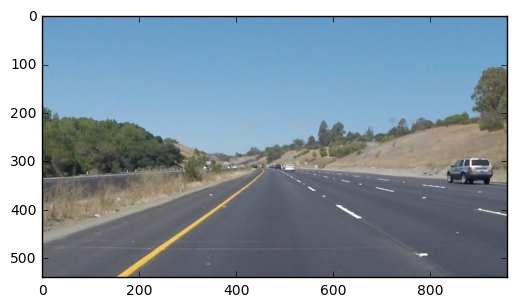

In [66]:
image = mpimg.imread('test_images/solidYellowCurve.jpg')
plt.imshow(image)

158


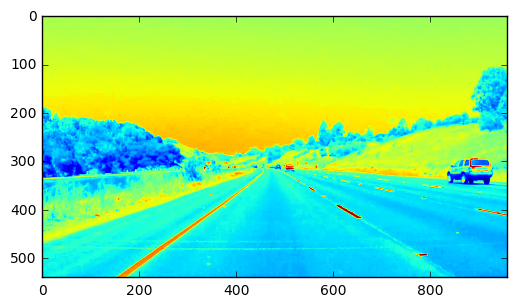

In [67]:
#TODO: gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
print(gray[100][100])
# # Display the image                 
# plt.imshow(color_select)


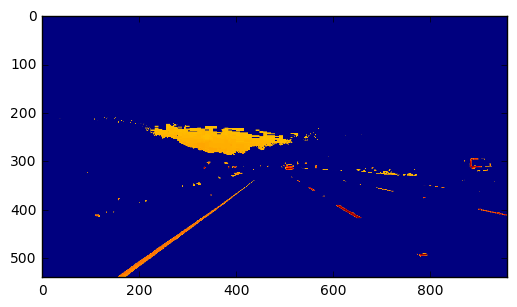

In [68]:
height = image.shape[0]
width = image.shape[1]
# # Read in the image and print out some stats
# # Note: in the previous example we were reading a .jpg 
# # Here we read a .png and convert to 0,255 bytescale
# image = (mpimg.imread('test.png')*255).astype('uint8')
# print('This image is: ',type(image), 
#          'with dimensions:', image.shape)

# # Grab the x and y size and make a copy of the image
# ysize = image.shape[0]
# xsize = image.shape[1]
color_select = np.copy(gray)

# # Define color selection criteria

hsv_threshold =[180]

# # Do a boolean or with the "|" character to identify
# # pixels below the thresholds
thresholds = (gray[:,:] < hsv_threshold[0])
color_select[thresholds] = [0]
plt.imshow(color_select)


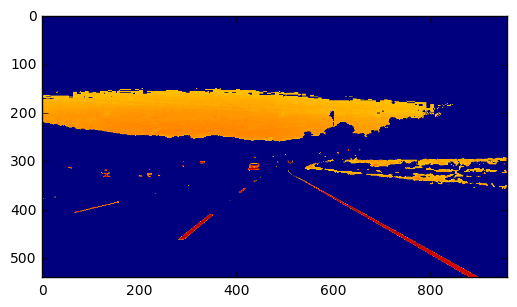

In [69]:
#TODO: compare white lines and yellow lines
sample = mpimg.imread('test_images/solidWhiteCurve.jpg')
sample_gray = cv2.cvtColor(sample, cv2.COLOR_RGB2GRAY)
sample_color_select = np.copy(sample_gray)
thresholds = (sample_gray[:,:] < hsv_threshold[0])
sample_color_select[thresholds] = [0]
plt.imshow(sample_color_select)

#looks like this filters most things relatively well for both white and yellow lanes

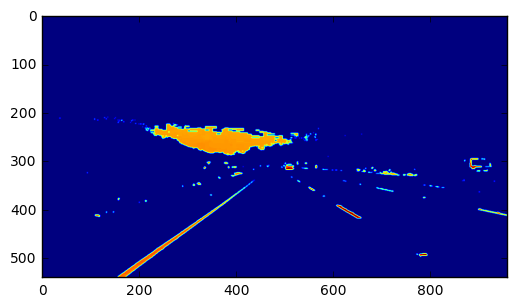

In [70]:
#TODO: gaussian blur
kernel_size = 5
color_select = cv2.GaussianBlur(color_select, (kernel_size, kernel_size), 0)
sample_color_select = cv2.GaussianBlur(sample_color_select, (kernel_size, kernel_size), 0)
plt.imshow(color_select)

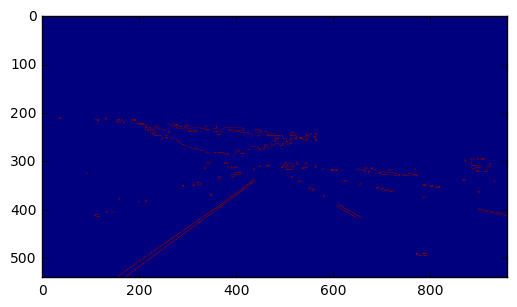

In [71]:
#TODO: canny
low_threshold = 50
high_threshold = 150
canny = cv2.Canny(color_select, low_threshold, high_threshold)
sample_canny = cv2.Canny(sample_color_select, low_threshold, high_threshold)
plt.imshow(canny)

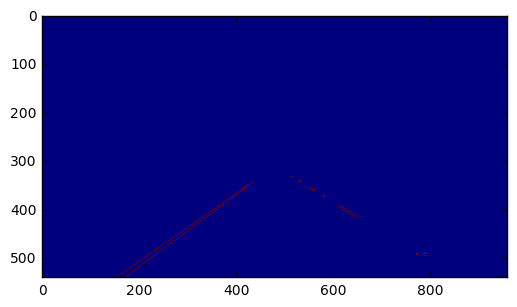

In [72]:
vertices = np.array([[(50,height),(480, 320), (500, 320), (width-50, height)]], dtype=np.int32)

roi = region_of_interest(canny, vertices)
sample_roi = region_of_interest(sample_canny, vertices)
plt.imshow(roi)

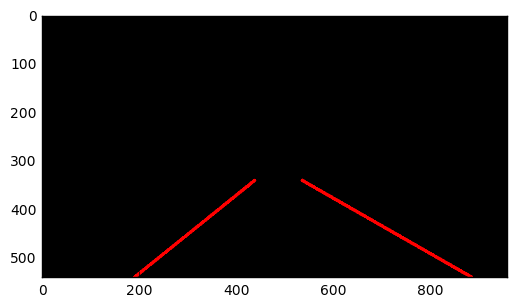

In [73]:
#TODO: Hough transform

rho = 1
theta = np.pi/180
threshold = 5
min_line_length = 10
max_line_gap = 5
line_image = np.copy(image)*0
    
hough = hough_lines(roi, rho, theta, threshold, min_line_length, max_line_gap)
sample_hough = hough_lines(sample_roi, rho, theta, threshold, min_line_length, max_line_gap)
plt.imshow(sample_hough)

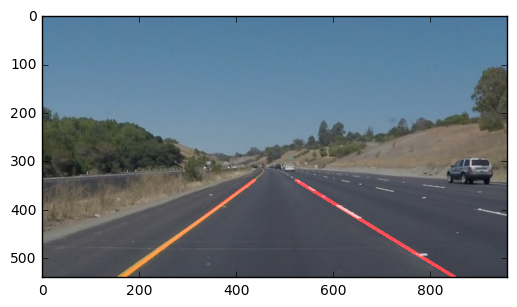

In [74]:
result = weighted_img(hough, image)
sample_result = weighted_img(sample_hough, sample)
plt.imshow(result)

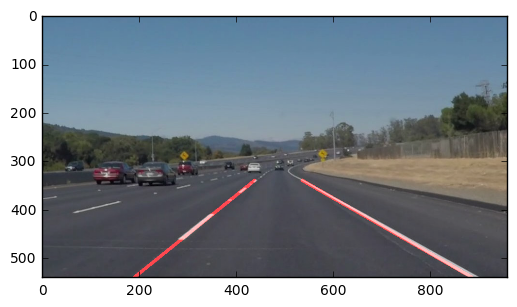

In [75]:
plt.imshow(sample_result)